In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random

In [2]:
layer = keras.layers.Dense(1)
layer(tf.random.normal(shape=(2,1)))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 0.79912704],
       [-2.1823146 ]], dtype=float32)>

In [3]:
"""
A Layer possuí um método base call,
ele é usado para computar a operação daquela layer.
"""
class TestLayer(keras.layers.Layer):
    
    def __init__(self):
        super(TestLayer,self).__init__(self)
        pass
        
    def call(self, inputs):
        return inputs - 1
    
teste = TestLayer()
x = tf.random.normal((1,1))
print(x)
y = teste(x)
print(y)

tf.Tensor([[0.7907233]], shape=(1, 1), dtype=float32)
tf.Tensor([[-0.20927668]], shape=(1, 1), dtype=float32)


In [4]:
"""
Aqui é como os pesos são construídos no Keras.

tf.Variable são vetores que são observados pelo tf.GradientTape, que é responsável pelo
cálculo de derivadas.

Por isso é importante que tudo que for diferenciável seja dessa classe ou convertido para.
"""
class TestLayerWeights(keras.layers.Layer):
    
    def __init__(self,input_dim=1,units=1):
        super(TestLayerWeights,self).__init__(self)
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim,units), dtype=tf.float32),
            trainable=True
        )
        self.b = tf.Variable(
            initial_value=w_init(shape=(units,), dtype=tf.float32),
            trainable=True
        )
        
    def call(self, inputs):
        return tf.matmul(inputs,self.w) - self.b

teste = TestLayerWeights(input_dim=4, units=10)
x = tf.random.normal((1,3,4))
print("X:",x)
y = teste(x)
print("Y:",y)
print("Weights:",teste.weights)

X: tf.Tensor(
[[[ 1.1755747  -1.3881282  -1.3608181  -1.3975841 ]
  [-0.9239104  -0.17140155 -2.5157466   1.0047506 ]
  [ 0.61664534 -1.7877053   1.2444392  -0.5463685 ]]], shape=(1, 3, 4), dtype=float32)
Y: tf.Tensor(
[[[ 1.0898769e-01  1.0183608e-01 -2.8841745e-02  2.3754090e-03
    3.0348882e-01  2.7971476e-01  6.8109885e-02  1.1065695e-01
   -2.6343593e-01  5.7663344e-02]
  [ 8.7578639e-02 -2.3888394e-01 -1.5640467e-01  8.7604500e-02
    3.9027715e-01  3.1661975e-01  5.9941959e-02  1.1904432e-01
   -6.7319609e-03 -3.9639711e-02]
  [-6.0213082e-02  1.1200490e-01 -7.1801960e-02 -8.6241677e-02
    1.6711026e-02  7.7250101e-02 -6.4326860e-02 -7.6521188e-05
   -4.2020049e-02  6.3109130e-02]]], shape=(1, 3, 10), dtype=float32)
Weights: [<tf.Variable 'Variable:0' shape=(4, 10) dtype=float32, numpy=
array([[ 0.00128136,  0.07615377,  0.06366847, -0.00567579, -0.01051965,
        -0.00306683, -0.00897184, -0.05325501, -0.0342367 , -0.01023763],
       [-0.01637596, -0.04021136,  0.02713594,

In [5]:
"""
Podemos usar também o self.add_weights para inicializar os pesos
da nossa camada.

Uma prática melhor no tensorflow é criar um método build, de forma que esse método
definirá as dimensões dos pesos quando for alimentado pelo input_shape
"""
from tensorflow import keras
import tensorflow as tf
class TestLayerWeights(keras.layers.Layer):
    
    def __init__(self,inputs_dim = 1, units = 1):
        super(TestLayerWeights, self).__init__()
        self.w = self.add_weight(
            shape = (inputs_dim, units),
            trainable = True,
            initializer = "random_normal"
        )
        self.b = self.add_weight(
            shape = (units,),
            initializer = "random_normal",
            trainable = True
        )
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w)
    
layer = TestLayerWeights()
layer(tf.ones((1,1)))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.05515614]], dtype=float32)>

In [6]:
"""
Um exemplo de Layer que não tá no keras, mas é bem fácil de implementar com ele.
"""

class LogSoftmax(keras.layers.Softmax):
    def __init__(self):
        super(LogSoftmax, self).__init__()
        
    def call(self, inputs):
        return tf.math.log(super(LogSoftmax, self).call(inputs))
    
x = tf.ones((1,1))
layer_a = keras.layers.Softmax()
layer_b = LogSoftmax()
print(layer_a(x))
print(layer_b(x))

tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


In [7]:
"""
Aqui é o exemplo de uma camada residual que recebe várias matrizes de dados e mantém alguma delas.
O resíduo não é somente características (colunas) dos dados, porém um conjunto de dados completos.
Não tem sentido retirar resíduo de um conjunto de dados. Só faz sentido tirar resíduo de vários
conjuntos de dados - que será um ou mais desses elementos.
"""
class ResidualLayer(keras.layers.Layer):
    def __init__(self, layer, residual_indexes):
        super(ResidualLayer, self).__init__()
        self.layer = layer
        self.residual_indexes = residual_indexes
        
    def call(self, inputs):
        result = [self.layer(inputs)]
        for i in self.residual_indexes:
            result.append(inputs[i])
        return result
    

x = tf.ones((2,4,4))
print(x)
layer = ResidualLayer(LogSoftmax(), residual_indexes=[0])
layer(x)

tf.Tensor(
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(2, 4, 4), dtype=float32)


[<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
 array([[[-1.3862944, -1.3862944, -1.3862944, -1.3862944],
         [-1.3862944, -1.3862944, -1.3862944, -1.3862944],
         [-1.3862944, -1.3862944, -1.3862944, -1.3862944],
         [-1.3862944, -1.3862944, -1.3862944, -1.3862944]],
 
        [[-1.3862944, -1.3862944, -1.3862944, -1.3862944],
         [-1.3862944, -1.3862944, -1.3862944, -1.3862944],
         [-1.3862944, -1.3862944, -1.3862944, -1.3862944],
         [-1.3862944, -1.3862944, -1.3862944, -1.3862944]]], dtype=float32)>,
 <tf.Tensor: shape=(4, 4), dtype=float32, numpy=
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=float32)>]

In [8]:
"""
Camada paralea, recebe como entrada duas layers,
Retorna o concatenado da aplicação de cada layer a input.
OU
Retorna o concatenado da aplicação de cada layer a parte da input.
"""
class ParallelLayer(keras.layers.Layer):
    def __init__(self, layer1, layer2):
        super(ParallelLayer, self).__init__()
        self.layer1 = layer1
        self.layer2 = layer2
        
    def call(self, inputs):
        return [self.layer1(inputs[0]), self.layer2(inputs[1])]#tf.concat([self.layer1(inputs), self.layer2(inputs)],axis=-1)


x = tf.ones((2,3,3))
print(x)
layer = ParallelLayer(keras.layers.Softmax(),LogSoftmax())
keras.layers.Add()(layer(x))

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]], shape=(2, 3, 3), dtype=float32)


<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.76527894, -0.76527894, -0.76527894],
       [-0.76527894, -0.76527894, -0.76527894],
       [-0.76527894, -0.76527894, -0.76527894]], dtype=float32)>

In [9]:
"""
Camada Select é responsável por replicar input ou selecionar específica.
Vale resaltar que essa layer faz a seleção por linhas, então não faz sentido
ela receber uma matriz de dados, mas várias matrizes de dados.

Se por algum motivo quiser replicar dados de uma matriz de dados ela pode ser útil,
mas não é seu propósito.
"""
class SelectLayer(keras.layers.Layer):
    def __init__(self, selector):
        super(SelectLayer, self).__init__()
        self.selector = selector
        
    def call(self, inputs):
        result = []
        for i in self.selector:
            result.append(inputs[i])
        return result
    
x1 = tf.random.normal((3,3))
x2 = tf.random.normal((3,3))
print(x1)
print(x2)
layer = SelectLayer([0,1,0,1])
layer([x1,x2])

tf.Tensor(
[[ 2.65134    -0.8783762  -0.4509038 ]
 [-2.0263605   0.3872522   1.2944845 ]
 [-0.54863095  1.0426693   0.39768296]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[-0.7864161  -0.54475415 -0.25410676]
 [ 0.8171431  -0.7232182   1.565929  ]
 [ 0.31962785  0.39307335 -0.963739  ]], shape=(3, 3), dtype=float32)


[<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 2.65134   , -0.8783762 , -0.4509038 ],
        [-2.0263605 ,  0.3872522 ,  1.2944845 ],
        [-0.54863095,  1.0426693 ,  0.39768296]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[-0.7864161 , -0.54475415, -0.25410676],
        [ 0.8171431 , -0.7232182 ,  1.565929  ],
        [ 0.31962785,  0.39307335, -0.963739  ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 2.65134   , -0.8783762 , -0.4509038 ],
        [-2.0263605 ,  0.3872522 ,  1.2944845 ],
        [-0.54863095,  1.0426693 ,  0.39768296]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[-0.7864161 , -0.54475415, -0.25410676],
        [ 0.8171431 , -0.7232182 ,  1.565929  ],
        [ 0.31962785,  0.39307335, -0.963739  ]], dtype=float32)>]

### Pequena Tarefa

Construir o seguinte modelo:

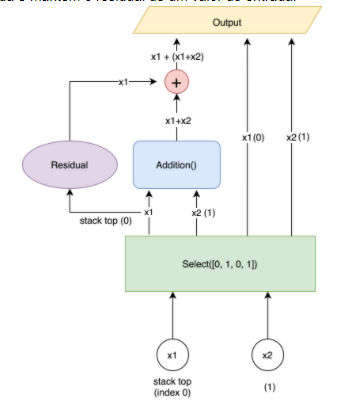

In [10]:
x1 = tf.ones((3,3))
x2 = tf.zeros((3,3))
result = ResidualLayer(keras.layers.Add(), residual_indexes = [0])([x1,x2])
result = keras.layers.Add()(result)
[result, x1, x2]

[<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32)>]

In [11]:
class Tarefa(keras.models.Model):
    def __init__(self):
        super(Tarefa, self).__init__()
        self.residual_0 = ResidualLayer(keras.layers.Add(), residual_indexes = [0])
        self.add_0 = keras.layers.Add()
    
    def call(self, inputs):
        result = self.residual_0(inputs)
        result = self.add_0(result)
        return [result, inputs[0], inputs[1]]
    
Tarefa()([tf.random.normal((3,3)),tf.random.normal((3,3))])

[<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 1.147783  , -3.6180534 , -1.7395934 ],
        [-2.0676706 , -1.3157253 , -3.2359123 ],
        [-2.8160026 ,  1.9744592 ,  0.95461726]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 0.12689403, -1.0828955 , -0.88977236],
        [-0.92118484, -0.56612444, -0.8351926 ],
        [-1.7283092 ,  0.6376671 ,  0.71818554]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 0.893995  , -1.4522624 ,  0.03995133],
        [-0.22530088, -0.18347648, -1.5655271 ],
        [ 0.64061576,  0.69912493, -0.4817538 ]], dtype=float32)>]

### Tarefa Maior

Agora, gostaria de construir um sistema de tradução. Claro, aqui o propósito é exercitar tensorflow, então não me refiro a parte de treino, mas somente ao seguinte modelo:

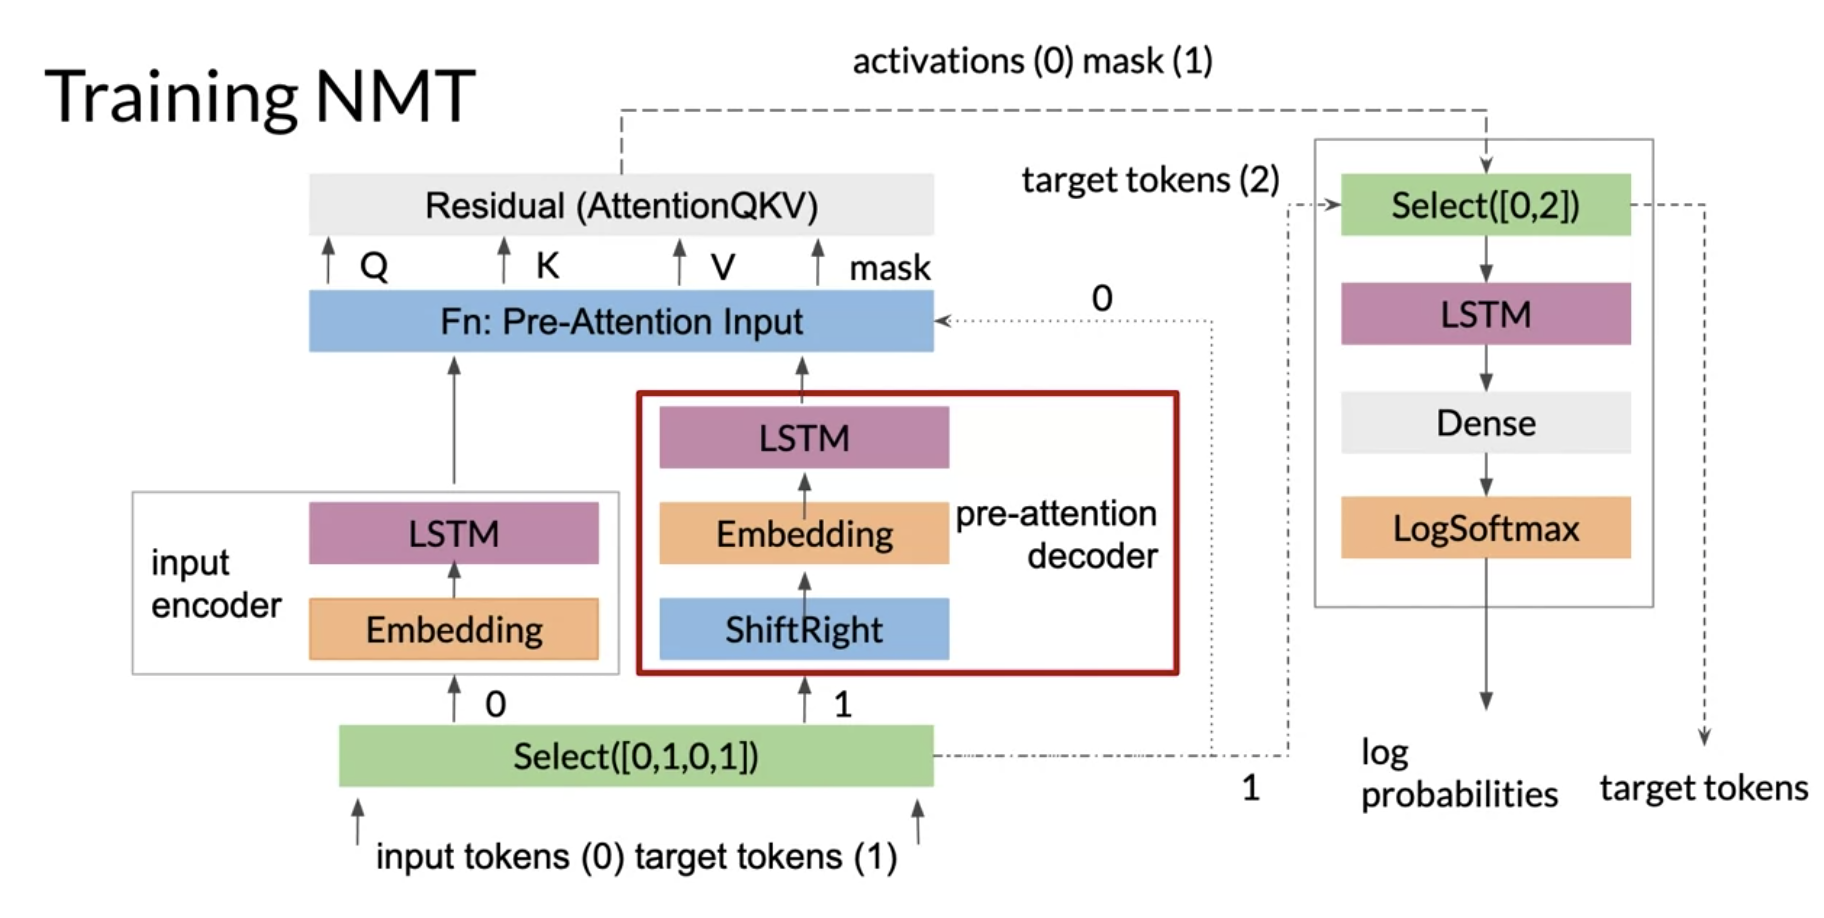


In [12]:
"""
Aqui são definidas as três camadas mais básicas do modelo de tradução.
A camada de pre-attention decoder. A camada de encoder e a camada de shift right.

"""
class ShiftLayer(keras.layers.Layer):
    def __init__(self, shift):
        super(ShiftLayer, self).__init__()
        self.shift = shift
    
    def call(self, inputs):
        output = np.zeros(inputs.shape)
        output[:,self.shift:] = inputs.numpy()[:,:-self.shift]
        return tf.convert_to_tensor(output)
        

class PreAttentionDecoder(keras.layers.Layer):
    def __init__(self, units, vocab_size, sentence_size, dim_size=100):
        super(PreAttentionDecoder, self).__init__()
        self.shift_layer = ShiftLayer(1)
        self.embedding = keras.layers.Embedding(vocab_size, dim_size, input_length=sentence_size)
        self.lstm = keras.layers.LSTM(units, return_sequences=True)
    
    def call(self, inputs):
        output = self.shift_layer(inputs)
        output = self.embedding(output)
        output = self.lstm(output)
        return output

class InputEncoder(keras.layers.Layer):
    def __init__(self, units, vocab_size, sentence_size, dim_size=100):
        super(InputEncoder, self).__init__()
        self.embedding = keras.layers.Embedding(vocab_size, dim_size, input_length=sentence_size)
        self.lstm = keras.layers.LSTM(units, return_sequences=True)
    
    def call(self, inputs):
        output = self.embedding(inputs)
        output = self.lstm(output)
        return output

def padding_simulation(x, offset_pad=4):
    x = x.numpy()
    mask = np.zeros((batch_size, sentence_size))
    for i in range(batch_size):
        offset= random.randint(0,offset_pad)
        if offset == 0:
            continue
        mask[i,:-offset] = x[i,:-offset]
        x[i,:]=mask[i,:]
    x = tf.convert_to_tensor(x)
    return x

batch_size = 5
sentence_size = 10
vocab_size = 10
units = 3
encoder = InputEncoder(units,vocab_size,sentence_size)
decoder = PreAttentionDecoder(units,vocab_size,sentence_size)
shift = ShiftLayer(1)
x = tf.random.uniform((batch_size, sentence_size), maxval=vocab_size, minval=1, dtype=tf.int32)
x = padding_simulation(x)
print(x)
print(shift(x))
print(encoder(x))
decoder(x)

tf.Tensor(
[[6 3 5 2 4 1 5 8 0 0]
 [4 9 4 3 8 1 3 5 0 0]
 [2 9 8 9 7 8 3 0 0 0]
 [8 7 2 5 9 2 5 6 6 0]
 [9 4 2 6 2 6 2 2 8 3]], shape=(5, 10), dtype=int32)
tf.Tensor(
[[0. 6. 3. 5. 2. 4. 1. 5. 8. 0.]
 [0. 4. 9. 4. 3. 8. 1. 3. 5. 0.]
 [0. 2. 9. 8. 9. 7. 8. 3. 0. 0.]
 [0. 8. 7. 2. 5. 9. 2. 5. 6. 6.]
 [0. 9. 4. 2. 6. 2. 6. 2. 2. 8.]], shape=(5, 10), dtype=float64)
tf.Tensor(
[[[-1.01528028e-02 -1.10323969e-02  7.06654182e-03]
  [-1.03462497e-02 -1.48530621e-02  3.20617035e-02]
  [ 4.13818751e-03 -6.93000853e-03  4.03293446e-02]
  [ 1.13473479e-02 -2.75842100e-03  3.71555351e-02]
  [ 2.23093890e-02 -1.12259537e-02  1.94559153e-02]
  [ 1.14972591e-02  4.62301867e-03  2.96478774e-02]
  [ 1.72940213e-02  9.97358374e-03  3.83453295e-02]
  [ 2.88869347e-02  9.32162569e-04  2.60850731e-02]
  [ 9.63000767e-03 -4.05035820e-03  4.06184793e-02]
  [ 7.05592538e-05 -7.77699007e-03  5.30324169e-02]]

 [[ 8.88626836e-03 -1.15825394e-02 -1.04938047e-02]
  [-3.04180896e-03  6.08775765e-03 -1.63836796e-02]

<tf.Tensor: shape=(5, 10, 3), dtype=float32, numpy=
array([[[ 3.04811681e-03, -7.92257767e-03, -4.29162569e-03],
        [ 3.12832706e-02, -2.78171916e-02, -7.25176884e-03],
        [ 1.99191254e-02, -2.34121419e-02, -6.61293697e-03],
        [ 1.37359118e-02, -3.35011631e-02, -1.01887295e-02],
        [ 1.90581549e-02, -2.36828420e-02,  7.88010191e-03],
        [ 2.02107597e-02, -1.94373485e-02,  5.30009577e-03],
        [-9.50406678e-03, -7.55111780e-03, -3.57171557e-05],
        [-6.97439304e-03, -1.71478521e-02, -2.66571599e-03],
        [-5.59106795e-03, -1.68812368e-02, -2.55468842e-02],
        [ 1.23140449e-03, -2.27752514e-02, -2.32473351e-02]],

       [[ 3.04811681e-03, -7.92257767e-03, -4.29162569e-03],
        [ 9.66120232e-03, -6.93814130e-03, -1.91911950e-03],
        [ 2.20659040e-02,  4.55105258e-03, -3.25005176e-03],
        [ 2.27047671e-02,  4.01547411e-04, -2.65873643e-03],
        [ 1.32220779e-02, -1.23164069e-03, -1.98449101e-03],
        [ 7.92560074e-03, -7.32

In [13]:
"""
Esta seria a camada que vem antes da attention layer. Ela prepara a entrada para a próxima camada.
Tem uma parte em que eu comento uma transformação na máscara. Essa transformação replica cada linha
da máscara transformando em uma matriz de linhas replicadas para cada máscara. Por hora isso não vai ser útil.
"""

class PreAttentionInput(keras.layers.Layer):
    
    def __init__(self):
        super(PreAttentionInput, self).__init__()
    
    def call(self, inputs):
        assert len(inputs) == 3 # keys==values, queries, inputs
        keys = inputs[0]
        values = inputs[0]
        queries = inputs[1]
        inputs = inputs[2]
        mask = np.array([[num>0 for num in element] for element in inputs])*1
        #mask = mask.reshape((mask.shape[0], 1, 1, mask.shape[1]))
        #mask = mask + np.zeros((1, 1, queries.shape[1], 1))
        mask = tf.convert_to_tensor(mask)
        return queries, values, keys, mask #mask is for padding only

preatt = PreAttentionInput()
print(x)
preatt([encoder(x),decoder(x),x])

tf.Tensor(
[[6 3 5 2 4 1 5 8 0 0]
 [4 9 4 3 8 1 3 5 0 0]
 [2 9 8 9 7 8 3 0 0 0]
 [8 7 2 5 9 2 5 6 6 0]
 [9 4 2 6 2 6 2 2 8 3]], shape=(5, 10), dtype=int32)


(<tf.Tensor: shape=(5, 10, 3), dtype=float32, numpy=
 array([[[ 3.04811681e-03, -7.92257767e-03, -4.29162569e-03],
         [ 3.12832706e-02, -2.78171916e-02, -7.25176884e-03],
         [ 1.99191254e-02, -2.34121419e-02, -6.61293697e-03],
         [ 1.37359118e-02, -3.35011631e-02, -1.01887295e-02],
         [ 1.90581549e-02, -2.36828420e-02,  7.88010191e-03],
         [ 2.02107597e-02, -1.94373485e-02,  5.30009577e-03],
         [-9.50406678e-03, -7.55111780e-03, -3.57171557e-05],
         [-6.97439304e-03, -1.71478521e-02, -2.66571599e-03],
         [-5.59106795e-03, -1.68812368e-02, -2.55468842e-02],
         [ 1.23140449e-03, -2.27752514e-02, -2.32473351e-02]],
 
        [[ 3.04811681e-03, -7.92257767e-03, -4.29162569e-03],
         [ 9.66120232e-03, -6.93814130e-03, -1.91911950e-03],
         [ 2.20659040e-02,  4.55105258e-03, -3.25005176e-03],
         [ 2.27047671e-02,  4.01547411e-04, -2.65873643e-03],
         [ 1.32220779e-02, -1.23164069e-03, -1.98449101e-03],
         [ 7.9

In [14]:
class AttentionLayer(keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()
        self.softmax = keras.layers.Softmax()
        
    def call(self,inputs):
        assert len(inputs) == 4 # query, values, keys, mask
        queries = inputs[0]
        values = inputs[1]
        keys = inputs[2]
        mask = inputs[3]
        d = tf.cast(keys.shape[-1], dtype=tf.float32)
        output = (tf.matmul(queries, keys, transpose_b=True)/tf.math.sqrt(d))
        output = self.softmax(output)
        output = tf.matmul(output, values)
        return output, mask

attention = AttentionLayer()
attention(preatt([encoder(x),decoder(x),x]))

(<tf.Tensor: shape=(5, 10, 3), dtype=float32, numpy=
 array([[[ 0.00846748, -0.00431005,  0.03237937],
         [ 0.0084693 , -0.00430983,  0.03237892],
         [ 0.00846845, -0.00431003,  0.03237902],
         [ 0.0084676 , -0.00431058,  0.03237858],
         [ 0.0084684 , -0.00430989,  0.03238024],
         [ 0.00846862, -0.00430976,  0.03238007],
         [ 0.00846641, -0.00431037,  0.03237971],
         [ 0.00846633, -0.00431062,  0.03237938],
         [ 0.00846642, -0.00431084,  0.03237744],
         [ 0.00846683, -0.00431079,  0.03237758]],
 
        [[ 0.00164322, -0.00741345,  0.01753495],
         [ 0.00164328, -0.00741344,  0.01753607],
         [ 0.00164346, -0.00741321,  0.01753523],
         [ 0.00164348, -0.00741332,  0.0175355 ],
         [ 0.00164332, -0.00741331,  0.01753601],
         [ 0.0016437 , -0.00741361,  0.01752334],
         [ 0.00164319, -0.00741329,  0.01752574],
         [ 0.00164308, -0.00741322,  0.0175305 ],
         [ 0.00164318, -0.00741356,  0.01753

In [15]:
class NextWordProbs(keras.layers.Layer):
    def __init__(self, units, vocab_size):
        super(NextWordProbs, self).__init__()
        self.lstm = keras.layers.LSTM(units, return_sequences=True)
        self.dense = keras.layers.Dense(vocab_size, activation="relu")
        self.logsoft = LogSoftmax()
        
    def call(self, inputs):
        assert len(inputs) == 3
        activation = inputs[0]
        mask = inputs[1]
        inputs = inputs[2]
        output = self.lstm(activation)
        output = self.dense(output)
        output = self.logsoft(output)
        return output, inputs
        
next_word = NextWordProbs(units, vocab_size)
att = preatt([encoder(x),decoder(x),x])
next_word([att[0],att[1],x])

(<tf.Tensor: shape=(5, 10, 10), dtype=float32, numpy=
 array([[[-2.3026454, -2.3026454, -2.3026454, -2.3026454, -2.3026454,
          -2.3022668, -2.3026454, -2.3026454, -2.3026454, -2.3024216],
         [-2.3030717, -2.3030717, -2.3030717, -2.3030717, -2.3030717,
          -2.299114 , -2.3030717, -2.3030717, -2.3030717, -2.3021693],
         [-2.3032548, -2.3032548, -2.3032548, -2.3032548, -2.3032548,
          -2.2983146, -2.3032548, -2.3032548, -2.3032548, -2.301509 ],
         [-2.3033884, -2.3033884, -2.3033884, -2.3033884, -2.3033884,
          -2.2982922, -2.3033884, -2.3033884, -2.3033884, -2.3004665],
         [-2.303579 , -2.303579 , -2.303579 , -2.303579 , -2.303579 ,
          -2.2973886, -2.303579 , -2.303579 , -2.303579 , -2.2998505],
         [-2.3036518, -2.3036518, -2.3036518, -2.3036518, -2.3036518,
          -2.2972229, -2.3036518, -2.3036518, -2.3036518, -2.2994375],
         [-2.303299 , -2.303299 , -2.303299 , -2.303299 , -2.303299 ,
          -2.3005593, -2.30329

In [16]:
class NeuralMachineTranslationModel(keras.models.Model):
    def __init__(self, units, vocab_size, sentence_size):
        super(NeuralMachineTranslationModel,self).__init__()
        self.__input_encoder__ = InputEncoder(units, vocab_size, sentence_size)
        self.__pre_attention_decoder__ = PreAttentionDecoder(units, vocab_size, sentence_size)
        self.__pre_attention_input__ = PreAttentionInput()
        self.__attention__ = AttentionLayer()
        self.__next_word_probs__ = NextWordProbs(units, vocab_size)
        
    def call(self, inputs):
        assert len(inputs) == 2
        encoder_out = self.__input_encoder__(inputs[0])
        decoder_out = self.__pre_attention_decoder__(inputs[1])
        pre_att_out = self.__pre_attention_input__([encoder_out, decoder_out, inputs[0]])
        actv, masks = self.__attention__([pre_att_out[0],pre_att_out[1],pre_att_out[2],pre_att_out[3]])
        output = self.__next_word_probs__([actv, masks, inputs[1]])
        return output

nmt = NeuralMachineTranslationModel(units, 10, sentence_size)
output, _ = nmt([x,x])
np.argmax(output[0,2,:].numpy())

6

In [17]:
def logsoftmax_sample(log_probs, temperature=1.0):
    """
      Retirado de trabalho alheio...
      Returns a sample from a log-softmax output, with temperature.
        
  Args:
      log_probs: Logarithms of probabilities (often coming from LogSofmax)
      temperature: For scaling before sampling (1.0 = default, 0.0 = pick argmax)
    """
  # This is equivalent to sampling from a softmax with temperature.
    u = np.random.uniform(low=1e-6, high=1.0 - 1e-6, size=log_probs.shape)
    g = -np.log(-np.log(u))
    return np.argmax(log_probs + g * temperature, axis=-1)

In [20]:
def next_symbol(NMTAttn, input_tokens, cur_output_tokens, temperature):
    """
        Retirado de trabalho alheio...
        Returns the index of the next token.

    Args:
        NMTAttn (tl.Serial): An LSTM sequence-to-sequence model with attention.
        input_tokens (np.ndarray 1 x n_tokens): tokenized representation of the input sentence
        cur_output_tokens (list): tokenized representation of previously translated words
        temperature (float): parameter for sampling ranging from 0.0 to 1.0.
            0.0: same as argmax, always pick the most probable token
            1.0: sampling from the distribution (can sometimes say random things)

    Returns:
        int: index of the next token in the translated sentence
        float: log probability of the next symbol
    """

    ### START CODE HERE (REPLACE INSTANCES OF `None` WITH YOUR CODE) ###
    # set the length of the current output tokens
    token_length = len(cur_output_tokens)
    
    # calculate next power of 2 for padding length 
    padded_length = int(2**np.ceil(np.log2(token_length + 1)))
    
    # pad cur_output_tokens up to the padded_length
    padded = np.array(cur_output_tokens + [0] * (padded_length - token_length))
    
    # model expects the output to have an axis for the batch size in front so
    # convert `padded` list to a numpy array with shape (x, <padded_length>) where the
    # x position is the batch axis. (hint: you can use np.expand_dims() with axis=0 to insert a new axis)
    padded_with_batch = np.expand_dims(padded, axis=0)
    
    # get the model prediction. remember to use the `NMTAttn` argument defined above.
    # hint: the model accepts a tuple as input (e.g. `my_model((input1, input2))`)
    output, _ = NMTAttn((input_tokens, padded_with_batch))
    
    # get log probabilities from the last token output
    log_probs = output[0, token_length,:]
    # get the next symbol by getting a logsoftmax sample (*hint: cast to an int)
    symbol = int(logsoftmax_sample(log_probs,temperature=temperature))
    
    ### END CODE HERE ###
    
    return symbol, float(log_probs[symbol])

In [21]:
next_symbol(nmt, np.array([1,2,3,4]), [], .5)

ValueError: Input 0 of layer lstm_3 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (4, 100)